### 일반검진 데이터 구성하기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rc('font', family='Malgun Gothic')
df = pd.read_excel('fitted.xlsx',encoding='utf-8')
df.head()
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# 일반 검진 데이터 만들기
normal = df[df['review_cat']=='일반검진']
normal

,customer_id,profit,review_cat,judge,gender,age,insu_req_amount,insu_pay_amount,insu_duration,insu_cum_amount,...,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge,risk
2,C112411,-313680,일반검진,재검,1,69,333680,553680,2,240000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,C112570,2022721,일반검진,재검,1,67,412210,412210,3,375000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,C112727,3048120,일반검진,승인,1,65,201880,201880,26,3250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,C112730,1099094,일반검진,승인,1,65,50160,50160,12,1440000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,C112742,108690,일반검진,승인,1,65,22160,266310,3,375000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4471,C134107,-515322,일반검진,재검,2,55,14950,14950,11,440000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4487,C134186,7610200,일반검진,승인,2,38,63700,63700,13,2860000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4488,C134188,-4993139,일반검진,승인,1,41,65610,6113139,28,1120000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4492,C134250,-1757672,일반검진,승인,2,52,65200,65200,7,350000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
nor = normal.dropna(axis=1)
nor.isnull().sum()

customer_id              0
profit                   0
review_cat               0
judge                    0
gender                   0
age                      0
insu_req_amount          0
insu_pay_amount          0
insu_duration            0
insu_cum_amount          0
height                   0
weight                   0
bust                     0
waist                    0
bmi                      0
whtr                     0
bp_min                   0
bp_max                   0
pulse_count              0
new_judge_score          0
new_bp_judge             0
new_pulse_count_judge    0
risk                     0
dtype: int64

In [5]:
# 데이터 구성
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 특성이 유사한 모델 선택, scaling 필요한 모델 제외
# DT, RF, GB, ANN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# 모델 성능 평가 : F1 score, ROC curce, AUC
from sklearn.metrics import f1_score, roc_curve, auc, precision_score, recall_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import numpy as np

# 패키지 불러오기 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
%matplotlib inline

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 추정검정 및 통계 분석 패키지
from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# 가설검정 및 통계 분석 패키지
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

In [6]:
# 범주형 변수 변환
nor['gender'] = nor['gender'].astype('object')
nor['new_bp_judge'] = nor['new_bp_judge'].astype('object')
nor['new_pulse_count_judge'] = nor['new_pulse_count_judge'].astype('object')
# 목표변수는 범주형 변환하면 안 된다. 이유는 모르겠지만, 모델 돌아가지 않음.

C:\Users\jykan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jykan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jykan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [7]:
# 데이터 분할
df_train, df_test = train_test_split(nor, test_size=0.3, random_state=1234)
print("Train data size:{}".format(df_train.shape))
print("Test data size:{}".format(df_test.shape))

Train data size:(689, 23)
Test data size:(296, 23)


### 다중 회귀분석

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [9]:
df_scale = nor[['profit','age','height','weight','bust','waist','bmi',
               'whtr','bp_min','bp_max','pulse_count','new_judge_score']]

In [10]:
reg_model = ols(formula='profit~age+height+weight+bust+waist+bmi+whtr+bp_min+bp_max+\
pulse_count+new_judge_score',data=df_scale)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.223
Date:                Fri, 08 May 2020   Prob (F-statistic):              0.267
Time:                        16:19:32   Log-Likelihood:                -16540.
No. Observations:                 985   AIC:                         3.310e+04
Df Residuals:                     973   BIC:                         3.316e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.855e+07   3.95e+07     

In [11]:
# 다중공선성 진단
df_scale_x=df_scale.drop("profit", axis=1)
df_scale_x_const=sm.add_constant(df_scale_x)
df_vif=pd.DataFrame()
df_vif["variable"]=df_scale_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_scale_x_const.values, i)
               for i in range(df_scale_x_const.shape[1])]
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

C:\Users\jykan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
11,new_judge_score,1.094
10,pulse_count,1.111
1,age,1.298
8,bp_min,3.256
9,bp_max,3.289
4,bust,3.758
2,height,147.445
6,bmi,151.117
3,weight,317.078
7,whtr,759.529


In [12]:
# 다중공선성 제거
df_scale_x=df_scale.drop(['waist','profit','weight'], axis=1)
df_scale_x_const=sm.add_constant(df_scale_x)
df_vif=pd.DataFrame()
df_vif["variable"]=df_scale_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_scale_x_const.values, i)
               for i in range(df_scale_x_const.shape[1])]
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,variable,VIF
9,new_judge_score,1.091
8,pulse_count,1.110
1,age,1.263
2,height,1.783
4,bmi,2.943
6,bp_min,3.255
7,bp_max,3.284
5,whtr,3.329
3,bust,3.747
0,const,922.269


In [13]:
# 후진제거법을 통한 변수 선택 - 7개 선택
df_scale_y=df_scale["profit"]
model=LinearRegression()
rfe=RFE(estimator=model, n_features_to_select=6).fit(df_scale_x, df_scale_y)
selected_cols=df_scale_x.columns[rfe.support_]
removed_cols=df_scale_x.columns[~rfe.support_]
print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))

Selected Variables:Index(['height', 'bust', 'bmi', 'whtr', 'pulse_count', 'new_judge_score'], dtype='object')
Removed Variables:Index(['age', 'bp_min', 'bp_max'], dtype='object')


In [14]:
rfe_reg_model=ols(formula="profit~height+bust+bmi+whtr+new_judge_score+pulse_count",data=df_scale)
rfe_reg_result=rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.795
Date:                Fri, 08 May 2020   Prob (F-statistic):             0.0970
Time:                        16:19:33   Log-Likelihood:                -16541.
No. Observations:                 985   AIC:                         3.310e+04
Df Residuals:                     978   BIC:                         3.313e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        9.139e+06    4.4e+06     

### 로지스틱 회귀분석

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 803 to 3730
Data columns (total 23 columns):
customer_id              689 non-null object
profit                   689 non-null int64
review_cat               689 non-null object
judge                    689 non-null object
gender                   689 non-null object
age                      689 non-null int64
insu_req_amount          689 non-null int64
insu_pay_amount          689 non-null int64
insu_duration            689 non-null int64
insu_cum_amount          689 non-null int64
height                   689 non-null int64
weight                   689 non-null int64
bust                     689 non-null int64
waist                    689 non-null int64
bmi                      689 non-null float64
whtr                     689 non-null float64
bp_min                   689 non-null int64
bp_max                   689 non-null int64
pulse_count              689 non-null int64
new_judge_score          689 non-null int64
new_

In [16]:
# 모델 및 회귀계수 검토
log_model3=Logit.from_formula("""risk~C(gender)+age+height+weight+bust+waist+bmi+whtr+C(new_bp_judge)+pulse_count+new_judge_score""",df_train)
# 적합
log_result3=log_model3.fit()
# 결과 출력
print(log_result3.summary())

         Current function value: 0.327097
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                  689
Model:                          Logit   Df Residuals:                      677
Method:                           MLE   Df Model:                           11
Date:                Fri, 08 May 2020   Pseudo R-squ.:                 0.02318
Time:                        16:19:33   Log-Likelihood:                -225.37
converged:                      False   LL-Null:                       -230.72
Covariance Type:            nonrobust   LLR p-value:                    0.4692
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -24.5475     31.879     -0.770      0.441     -87.030      37.935
C(gender)[T.2]          -0.4395    

C:\Users\jykan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [17]:
y_pred3=log_result3.predict(df_test)
y_pred_class3=(y_pred3>0.5).astype(int)
y_pred_class3.head()
# 실제 test 데이터의 목표변수의 test 데이터의 예측값 비교
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_test["risk"], y_pred_class3)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["risk"], y_pred_class3)))

Accuracy:0.875

Confusion Matrix:
[[259   0]
 [ 37   0]]


In [18]:
# 결론 도출 - 표준화 회귀 계수
# 특정 변수 타입을 선택 / 제외하여 데이터 추출
df_char=df.select_dtypes(include="object")
df_numeric=df.select_dtypes(exclude="object")
# Data Scaling
scaler=StandardScaler()
np_numeric_scaled=scaler.fit_transform(df_numeric)
df_numeric_scaled=pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns)
# 문자 데이터 + 숫자 데이터
df_scaled=pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

,profit,gender,age,insu_req_amount,insu_pay_amount,insu_duration,insu_cum_amount,height,weight,bust,...,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge,risk,customer_id,review_cat,judge,bt_hbsa
0,-0.397175,-1.241715,2.145042,0.776761,0.109692,-0.415082,-0.343219,-0.446427,-0.317103,-1.077887,...,NaN,1.478107,-0.194854,-0.282298,NaN,-0.389130,C112379,혈액검사,재검,NEGATIVE
1,-0.597937,-1.241715,2.145042,0.467825,0.224736,-0.971137,-0.680670,1.503526,1.696833,1.249325,...,NaN,1.478107,-0.194854,-0.282298,1.598481,2.569837,C112404,혈액검사,재검,NEGATIVE
2,-0.578738,-1.241715,2.145042,0.536913,0.040558,-1.249164,-0.849396,0.203558,0.790562,0.017272,...,NaN,NaN,NaN,NaN,NaN,2.569837,C112411,일반검진,재검,NaN
3,-0.106930,-1.241715,1.943530,0.744309,-0.016699,-1.156488,-0.786124,0.203558,1.294046,0.427956,...,NaN,NaN,NaN,NaN,NaN,-0.389130,C112570,일반검진,재검,NaN
4,0.100138,-1.241715,1.742019,0.188831,-0.101824,0.975055,0.561340,-0.446427,-1.223374,-0.393413,...,NaN,NaN,NaN,NaN,NaN,-0.389130,C112727,일반검진,승인,NaN


In [19]:
df_scaled['risk'] = np.where(df_scaled['risk']<0,0,1)
df_scaled

,profit,gender,age,insu_req_amount,insu_pay_amount,insu_duration,insu_cum_amount,height,weight,bust,...,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge,risk,customer_id,review_cat,judge,bt_hbsa
0,-0.397175,-1.241715,2.145042,0.776761,0.109692,-0.415082,-0.343219,-0.446427,-0.317103,-1.077887,...,NaN,1.478107,-0.194854,-0.282298,NaN,0,C112379,혈액검사,재검,NEGATIVE
1,-0.597937,-1.241715,2.145042,0.467825,0.224736,-0.971137,-0.680670,1.503526,1.696833,1.249325,...,NaN,1.478107,-0.194854,-0.282298,1.598481,1,C112404,혈액검사,재검,NEGATIVE
2,-0.578738,-1.241715,2.145042,0.536913,0.040558,-1.249164,-0.849396,0.203558,0.790562,0.017272,...,NaN,NaN,NaN,NaN,NaN,1,C112411,일반검진,재검,NaN
3,-0.106930,-1.241715,1.943530,0.744309,-0.016699,-1.156488,-0.786124,0.203558,1.294046,0.427956,...,NaN,NaN,NaN,NaN,NaN,0,C112570,일반검진,재검,NaN
4,0.100138,-1.241715,1.742019,0.188831,-0.101824,0.975055,0.561340,-0.446427,-1.223374,-0.393413,...,NaN,NaN,NaN,NaN,NaN,0,C112727,일반검진,승인,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,-0.091536,-1.241715,-0.575367,-0.317920,-0.157992,0.882379,0.209827,1.893517,0.790562,0.427956,...,NaN,-0.676541,-0.194854,-0.282298,NaN,0,C134197,혈액검사,재검,NEGATIVE
4490,-1.797915,0.805338,0.331436,1.302850,0.263164,-1.341840,-0.915012,-0.576424,-1.021981,-0.940992,...,-0.135063,-0.676541,-0.194854,-0.282298,-0.625594,1,C134221,혈액검사,재검,NEGATIVE
4491,-0.346176,0.805338,-0.273099,-0.231824,-0.166289,-0.971137,-0.727539,-1.356405,-1.726858,-0.530307,...,-0.135063,NaN,NaN,-0.282298,NaN,0,C134227,혈액검사,재검,NEGATIVE
4492,-0.870336,0.805338,0.432192,-0.172138,-0.157142,-0.785785,-0.797841,0.073561,-0.216406,-0.256518,...,NaN,NaN,NaN,NaN,NaN,1,C134250,일반검진,승인,NaN


In [20]:
df_scaled['new_pulse_count_judge'] = np.where(df_scaled['new_pulse_count_judge']<0,0,1)

In [21]:
df_scaled['new_bp_judge'] = np.where(df_scaled['new_bp_judge']<0,0,1)

In [22]:
df_scaled['gender'] = np.where(df_scaled['gender']<0,1,2)

In [23]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size=0.3, random_state=1234)
print("Train data size:{}".format(df_train.shape))
print("Test data size:{}".format(df_test.shape))

Train data size:(689, 23)
Test data size:(296, 23)


In [24]:
# 모델 및 회귀계수 검토
scaled_log_model3=Logit.from_formula("""risk~C(gender)+age+height+weight+bust+waist+bmi+whtr+C(new_bp_judge)+pulse_count+new_judge_score""",df_scaled_train)
# 적합
scaled_log_result3=scaled_log_model3.fit()
# 결과 출력
print(scaled_log_result3.summary())

Optimization terminated successfully.
         Current function value: 0.381377
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                 3145
Model:                          Logit   Df Residuals:                     3133
Method:                           MLE   Df Model:                           11
Date:                Fri, 08 May 2020   Pseudo R-squ.:                0.008536
Time:                        16:19:33   Log-Likelihood:                -1199.4
converged:                       True   LL-Null:                       -1209.8
Covariance Type:            nonrobust   LLR p-value:                   0.03714
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.9286      0.124    -15.499      0.000      -2.172      -1.685

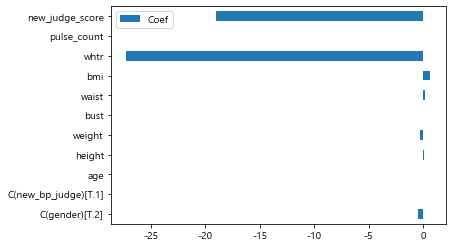

In [25]:
# 설명변수 중요도
df_logistic_coef3=pd.DataFrame({"Coef":log_result3.params.values[1:]}, index=log_model3.exog_names[1:])
df_logistic_coef3.plot.barh(y="Coef")

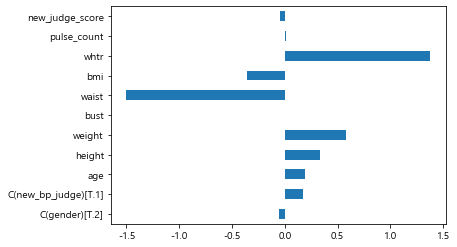

In [26]:
# 설명변수 중요도
df_log_scaled_coef=pd.DataFrame({"Coef":scaled_log_result3.params.values[1:]}, 
                                index=scaled_log_model3.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef", legend=False)

### 의사결정나무

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz

In [28]:
nor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 2 to 4493
Data columns (total 23 columns):
customer_id              985 non-null object
profit                   985 non-null int64
review_cat               985 non-null object
judge                    985 non-null object
gender                   985 non-null object
age                      985 non-null int64
insu_req_amount          985 non-null int64
insu_pay_amount          985 non-null int64
insu_duration            985 non-null int64
insu_cum_amount          985 non-null int64
height                   985 non-null int64
weight                   985 non-null int64
bust                     985 non-null int64
waist                    985 non-null int64
bmi                      985 non-null float64
whtr                     985 non-null float64
bp_min                   985 non-null int64
bp_max                   985 non-null int64
pulse_count              985 non-null int64
new_judge_score          985 non-null int64
new_bp

In [29]:
# risk와 직접적인 관련이 있는 'profit' 제외
df_end = nor.drop(['customer_id','review_cat','profit'
                  ,'insu_pay_amount','insu_cum_amount',
                  'insu_req_amount','insu_duration','judge','bp_min','bp_max',
                  'new_pulse_count_judge'], axis=1, inplace=False)
df_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 2 to 4493
Data columns (total 12 columns):
gender             985 non-null object
age                985 non-null int64
height             985 non-null int64
weight             985 non-null int64
bust               985 non-null int64
waist              985 non-null int64
bmi                985 non-null float64
whtr               985 non-null float64
pulse_count        985 non-null int64
new_judge_score    985 non-null int64
new_bp_judge       985 non-null object
risk               985 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 100.0+ KB


In [30]:
# 더미 변수 생성
pf_end = pd.get_dummies(df_end)
pf_end.head()
df_end = pf_end
df_end

,age,height,weight,bust,waist,bmi,whtr,pulse_count,new_judge_score,risk,gender_1,gender_2,new_bp_judge_0,new_bp_judge_1
2,69,165,70,92,88,25.711662,0.533333,68,0,1,1,0,1,0
3,67,165,75,95,89,27.548209,0.539394,70,0,0,1,0,0,1
4,65,160,50,89,66,19.531250,0.412500,64,0,0,1,0,0,1
5,65,164,64,97,80,23.795360,0.487805,68,0,0,1,0,0,1
6,65,169,62,89,72,21.707923,0.426036,70,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4471,55,158,63,98,80,25.236340,0.506329,70,0,1,0,1,0,1
4487,38,161,65,94,80,25.076193,0.496894,72,0,0,0,1,1,0
4488,41,175,78,100,92,25.469388,0.525714,66,0,1,1,0,1,0
4492,52,164,60,90,66,22.308150,0.402439,70,0,1,0,1,1,0


In [31]:
df_raw_y=df_end["risk"]
df_raw_x=df_end.drop("risk", axis=1, inplace=False)

In [32]:
# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3, random_state = 1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (393, 13)
train data Y size : (393,)
validation data X size : (296, 13)
validation data Y size : (296,)
test data X size : (296, 13)
test data Y size : (296,)


In [33]:
# 모델 생성
dt_tree_uncustomized = DecisionTreeClassifier(random_state=1234)
dt_tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Accuracy on training set:{:.3f}".format(dt_tree_uncustomized.score(df_train_x, df_train_y)))
# Validation 데이터 설명력
print("Accuracy on validation set:{:.3f}".format(dt_tree_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set:1.000
Accuracy on validation set:0.794


In [34]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# max_depth : 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["ValidAccuracy"]=valid_accuracy

In [35]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidAccuracy
0,1,0.891,0.892
1,2,0.893,0.902
2,3,0.896,0.905
3,4,0.903,0.882
4,5,0.911,0.889
5,6,0.926,0.838
6,7,0.939,0.865
7,8,0.957,0.848
8,9,0.964,0.834
9,10,0.975,0.834


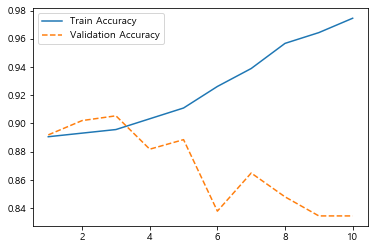

In [36]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

In [37]:
# 변수명 저장
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth=3,random_state=1234)
tree_low.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [38]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split=[n_split*2 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth=3, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["ValidationAccuracy"]=valid_accuracy

In [39]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,2,0.896,0.905
1,4,0.893,0.905
2,6,0.891,0.892
3,8,0.891,0.892
4,10,0.891,0.892
5,12,0.891,0.892
6,14,0.891,0.892
7,16,0.891,0.892
8,18,0.891,0.892
9,20,0.891,0.892


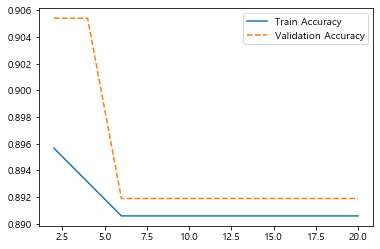

In [40]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

In [41]:
# 깊이가 3 모델
tree_low=DecisionTreeClassifier(max_depth=3, min_samples_split = 2, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [42]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# min_samples_leaf : 잎사귀 노드 최소 자료 수 제한
para_leaf=[n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(min_samples_leaf=v_min_samples_leaf,min_samples_split=2,
                                max_depth=3, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_depth
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["ValidAccuracy"]=valid_accuracy

In [43]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidAccuracy
0,1,0.893,0.905
1,2,0.891,0.892
2,3,0.888,0.905
3,4,0.888,0.905
4,5,0.888,0.905
5,6,0.888,0.905
6,7,0.888,0.905
7,8,0.888,0.905
8,9,0.888,0.905
9,10,0.888,0.905


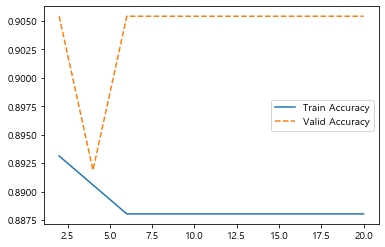

In [44]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, valid_accuracy, linestyle="--", label="Valid Accuracy")
plt.legend()

In [45]:
dt_tree_final=DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=1234)
dt_tree_final.fit(df_test_x, df_test_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [46]:
# 평가
dt_y_pred=dt_tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(dt_tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, dt_y_pred)))

Accuracy:0.885

Confusion matrix:
[[259   0]
 [ 34   3]]


In [47]:
# 설명변수 중요도 확인 및 테이블 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=dt_tree_final.feature_importances_
# 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
6,whtr,0.280
4,waist,0.202
0,age,0.190
2,weight,0.171
7,pulse_count,0.157
1,height,0.000
3,bust,0.000
5,bmi,0.000
8,new_judge_score,0.000
9,gender_1,0.000


Text(0, 0.5, '설명변수')

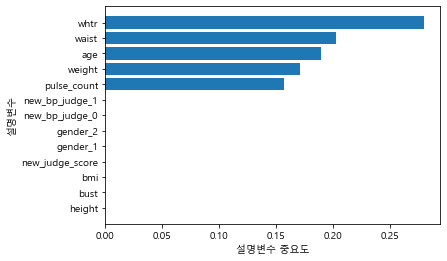

In [48]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 랜덤 포레스트

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# 랜덤 포레스트 모델 생성
rf_uncustomized=RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# train 데이터셋 정확도
print("Accuracy on training set:{:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Validation 데이터 설명력
print("Accuracy on validation set:{:.3f}".format(rf_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set:0.992
Accuracy on validation set:0.889


C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# n_estimators : 트리수 변경 1~150
para_n_tree=[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    tree=RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"]=para_n_tree
df_accuracy_n["TrainAccuracy"]=train_accuracy
df_accuracy_n["ValidAccuracy"]=valid_accuracy

In [52]:
# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,ValidAccuracy
0,10,0.992,0.889
1,20,0.997,0.899
2,30,0.997,0.899
3,40,1.000,0.899
4,50,1.000,0.902
5,60,1.000,0.905
6,70,1.000,0.905
7,80,1.000,0.905
8,90,1.000,0.905
9,100,1.000,0.905


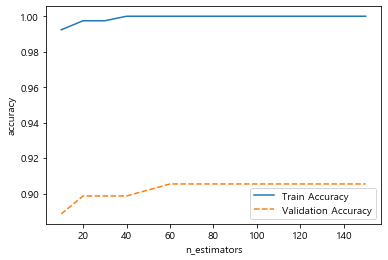

In [53]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()

C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably me

Text(0.5, 0, 'n_estimators')

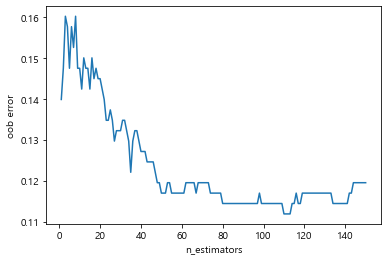

In [54]:
# error 저장 리스트
oob_error=[]
for v_n_estimator in range(1,151):
    rf=RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True,
                             random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)
# 그래프로 표현
plt.plot(range(1,151),oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [55]:
# 트리수 지정
n_estimators=110

In [56]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# max_depth : 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=RandomForestClassifier(max_depth=v_max_depth,
                                n_estimators=130
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["ValidAccuracy"]=valid_accuracy

In [57]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidAccuracy
0,1,0.888,0.905
1,2,0.888,0.905
2,3,0.888,0.905
3,4,0.893,0.905
4,5,0.896,0.905
5,6,0.913,0.905
6,7,0.941,0.905
7,8,0.959,0.902
8,9,0.975,0.905
9,10,0.992,0.905


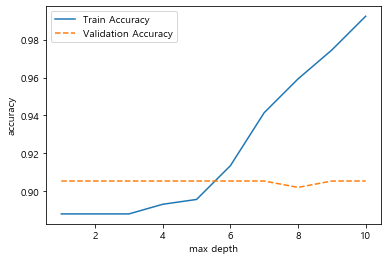

In [58]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()

In [59]:
# 최대 깊이 지정
max_depth=10

In [60]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=RandomForestClassifier(n_estimators=110,
                                min_samples_split=v_min_samples_split, 
                                max_depth=10, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["ValidationAccuracy"]=valid_accuracy

In [61]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,10,0.903,0.905
1,20,0.893,0.905
2,30,0.893,0.905
3,40,0.888,0.905
4,50,0.888,0.905
5,60,0.888,0.905
6,70,0.888,0.905
7,80,0.888,0.905
8,90,0.888,0.905
9,100,0.888,0.905


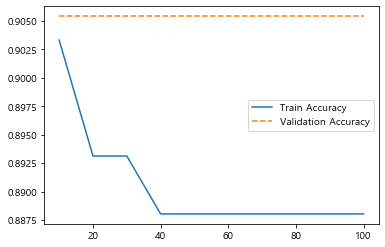

In [62]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

In [63]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# min_samples_leaf : 잎사귀 노드 최소 자료 수 제한
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(n_estimators=110,
                              min_samples_leaf=v_min_samples_leaf,
                              min_samples_split=10,
                                max_depth=10, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_depth
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["ValidAccuracy"]=valid_accuracy

In [64]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidAccuracy
0,1,0.888,0.905
1,2,0.888,0.905
2,3,0.888,0.905
3,4,0.888,0.905
4,5,0.888,0.905
5,6,0.888,0.905
6,7,0.888,0.905
7,8,0.888,0.905
8,9,0.888,0.905
9,10,0.888,0.905


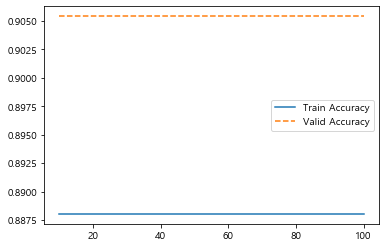

In [65]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, valid_accuracy, linestyle="--", label="Valid Accuracy")
plt.legend()

In [66]:
rf_tree_final=RandomForestClassifier(n_estimators=110, max_depth=10, min_samples_split=10, 
                                     min_samples_leaf=1, random_state=1234)
rf_tree_final.fit(df_test_x, df_test_y)
# 평가
rf_y_pred=rf_tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(rf_tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, rf_y_pred)))

Accuracy:0.889

Confusion matrix:
[[259   0]
 [ 33   4]]


In [67]:
# 변수명
v_feature_name=df_train_x.columns
# 설명변수 중요도 확인 및 테이블 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_tree_final.feature_importances_
# 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
6,whtr,0.141
5,bmi,0.135
4,waist,0.130
0,age,0.124
2,weight,0.117
7,pulse_count,0.113
1,height,0.108
3,bust,0.086
11,new_bp_judge_0,0.016
10,gender_2,0.011


Text(0, 0.5, '설명변수')

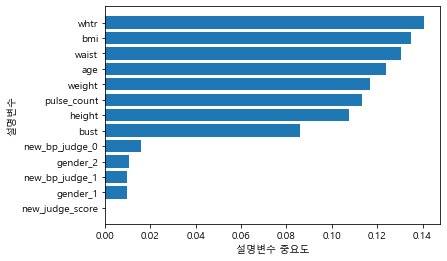

In [68]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 그래디언트 부스팅

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gb_uncustomized=GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# train 데이터셋 정확도
print("Accuracy on training set:{:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Validation 데이터 설명력
print("Accuracy on validation set:{:.3f}".format(gb_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set:0.972
Accuracy on validation set:0.889


In [71]:
# train / test 정확도 결과 저장
train_accuracy=[]
val_accuracy=[]
# learning rate 변경 : 0.1~0.9
para_lr=[lr*0.05 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(learning_rate=v_learning_rate, 
                                 random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))
# 테이블로 저장
df_accuracy_lr=pd.DataFrame()
df_accuracy_lr["LearningRate"]=para_lr
df_accuracy_lr["TrainAccuracy"]=train_accuracy
df_accuracy_lr["ValidationAccuracy"]=val_accuracy

In [72]:
# learning rate 별 정확도 테이블
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,ValidationAccuracy
0,0.05,0.936,0.889
1,0.10,0.972,0.889
2,0.15,0.992,0.882
3,0.20,1.000,0.872
4,0.25,1.000,0.878
5,0.30,1.000,0.861
6,0.35,1.000,0.855
7,0.40,1.000,0.878
8,0.45,1.000,0.861


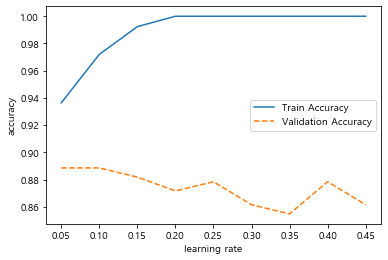

In [73]:
# Learning rate별 정확도 그래프로 확인
plt.plot(para_lr, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_lr, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

In [74]:
# train / test 정확도 결과 저장
train_accuracy=[]
val_accuracy=[]
# n_estimators : 트리수 변경 10~150
para_n_tree=[n_tree*10 for n_tree in range(1,16)]
for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(n_estimators=v_n_estimators,
                                  learning_rate=0.05,
                                 random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))
# 테이블로 저장
df_accuracy_n=pd.DataFrame()
df_accuracy_n["Estimators"]=para_n_tree
df_accuracy_n["TrainAccuracy"]=train_accuracy
df_accuracy_n["ValidationAccuracy"]=val_accuracy

In [75]:
# n_estimators별 정확도
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,ValidationAccuracy
0,10,0.888,0.905
1,20,0.893,0.905
2,30,0.901,0.905
3,40,0.906,0.895
4,50,0.911,0.895
5,60,0.921,0.895
6,70,0.921,0.895
7,80,0.926,0.895
8,90,0.934,0.892
9,100,0.936,0.889


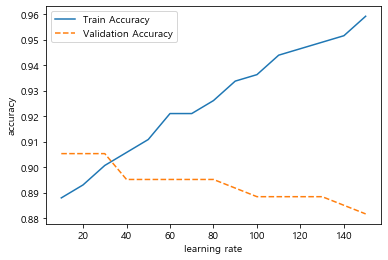

In [76]:
# Learning rate별 정확도 그래프로 확인
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

In [77]:
# train 및 test 정확도 결과 저장
train_accuracy = []
val_accuracy= []

# max_depth : 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingClassifier(max_depth=v_max_depth,
                                n_estimators=100,
                                learning_rate=0.05,
                                random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["ValidationAccuracy"]=val_accuracy

In [78]:
# max_depth별 정확도 테이블
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidationAccuracy
0,1,0.893,0.905
1,2,0.908,0.895
2,3,0.936,0.889
3,4,0.969,0.892
4,5,0.995,0.892
5,6,1.000,0.892
6,7,1.000,0.875
7,8,1.000,0.875
8,9,1.000,0.889
9,10,1.000,0.811


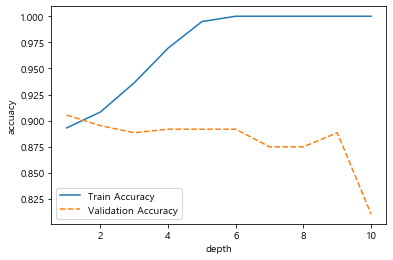

In [79]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuacy")
plt.xlabel("depth")
plt.legend()

In [80]:
# train 및 test 정확도 결과 저장
train_accuracy = []
val_accuracy= []

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split=[n_split*10 for n_split in range(2,11)]

for v_min_samples_split in para_split:
    gb=GradientBoostingClassifier(min_samples_split=v_min_samples_split
                                  ,max_depth=3,
                                n_estimators=100,
                                learning_rate=0.05,
                                random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["ValidationAccuracy"]=val_accuracy

In [81]:
# min_samples_split 정확도 테이블
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,20,0.929,0.899
1,30,0.921,0.895
2,40,0.921,0.895
3,50,0.913,0.895
4,60,0.913,0.895
5,70,0.913,0.895
6,80,0.913,0.895
7,90,0.916,0.895
8,100,0.913,0.899


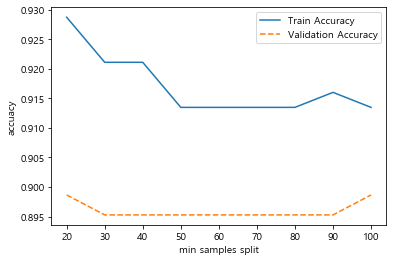

In [82]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuacy")
plt.xlabel("min samples split")
plt.legend()

In [83]:
# train 및 test 정확도 결과 저장
train_accuracy = []
val_accuracy= []

# min_samples_leaf :잎사귀 노드 최소 자료수 제한
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingClassifier(min_samples_leaf=v_min_samples_leaf
        ,min_samples_split=50
                                  ,max_depth=3,
                                n_estimators=100,
                                learning_rate=0.05,
                                random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["ValidationAccuracy"]=val_accuracy

In [84]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidationAccuracy
0,10,0.913,0.905
1,20,0.911,0.905
2,30,0.893,0.905
3,40,0.891,0.905
4,50,0.888,0.905
5,60,0.888,0.905
6,70,0.888,0.905
7,80,0.888,0.905
8,90,0.888,0.905
9,100,0.888,0.905


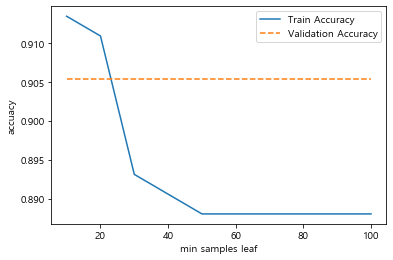

In [85]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuacy")
plt.xlabel("min samples leaf")
plt.legend()

In [86]:
# 최종 모델
gb_final=GradientBoostingClassifier(min_samples_leaf=30,
                                    min_samples_split=30,
                                   max_depth=6,
                                   n_estimators=100,
                                   learning_rate=0.05,
                                   random_state=1234)
gb_final.fit(df_train_x, df_train_y)

# 예측
gb_y_pred=gb_final.predict(df_test_x)

# Train 데이터 정확도 / Test 데이터 정확도
print("Accuracy on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on Test set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, gb_y_pred)))

Accuracy on training set:0.924
Accuracy on Test set:0.868
Confusion matrix:
[[257   2]
 [ 37   0]]


In [87]:
# feature_importances_ : 설명변수 중요도
v_feature_name=df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
1,height,0.197
5,bmi,0.177
0,age,0.162
7,pulse_count,0.130
6,whtr,0.091
4,waist,0.090
3,bust,0.070
2,weight,0.060
12,new_bp_judge_1,0.011
10,gender_2,0.005


Text(0, 0.5, '설명변수')

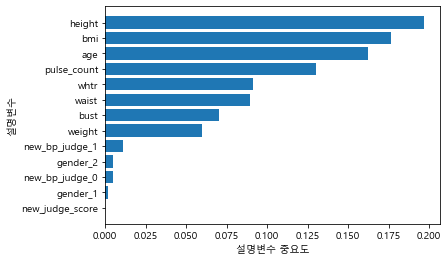

In [88]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [89]:
nor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 2 to 4493
Data columns (total 23 columns):
customer_id              985 non-null object
profit                   985 non-null int64
review_cat               985 non-null object
judge                    985 non-null object
gender                   985 non-null object
age                      985 non-null int64
insu_req_amount          985 non-null int64
insu_pay_amount          985 non-null int64
insu_duration            985 non-null int64
insu_cum_amount          985 non-null int64
height                   985 non-null int64
weight                   985 non-null int64
bust                     985 non-null int64
waist                    985 non-null int64
bmi                      985 non-null float64
whtr                     985 non-null float64
bp_min                   985 non-null int64
bp_max                   985 non-null int64
pulse_count              985 non-null int64
new_judge_score          985 non-null int64
new_bp

In [90]:
df_end = nor.drop(['customer_id','profit','review_cat',
                   'judge','insu_req_amount',
                  'insu_pay_amount','insu_duration','insu_cum_amount',
                  'bp_min','bp_max','new_pulse_count_judge'],axis=1)

In [91]:
# 더미 변수 생성
pf_end = pd.get_dummies(df_end)
pf_end.head()
df_end = pf_end
df_end
df_raw_y=df_end["risk"]
df_raw_x=df_end.drop("risk", axis=1, inplace=False)
# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3, random_state = 1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (393, 13)
train data Y size : (393,)
validation data X size : (296, 13)
validation data Y size : (296,)
test data X size : (296, 13)
test data Y size : (296,)


In [92]:
gb_uncustomized=GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# train 데이터셋 정확도
print("Accuracy on training set:{:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Validation 데이터 설명력
print("Accuracy on validation set:{:.3f}".format(gb_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set:0.972
Accuracy on validation set:0.889


In [93]:
# train / test 정확도 결과 저장
train_accuracy=[]
val_accuracy=[]
# learning rate 변경 : 0.1~0.9
para_lr=[lr*0.05 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(learning_rate=v_learning_rate, 
                                 random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))
# 테이블로 저장
df_accuracy_lr=pd.DataFrame()
df_accuracy_lr["LearningRate"]=para_lr
df_accuracy_lr["TrainAccuracy"]=train_accuracy
df_accuracy_lr["ValidationAccuracy"]=val_accuracy

In [94]:
# learning rate 별 정확도 테이블
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,ValidationAccuracy
0,0.05,0.936,0.889
1,0.10,0.972,0.889
2,0.15,0.992,0.882
3,0.20,1.000,0.872
4,0.25,1.000,0.878
5,0.30,1.000,0.861
6,0.35,1.000,0.855
7,0.40,1.000,0.878
8,0.45,1.000,0.861


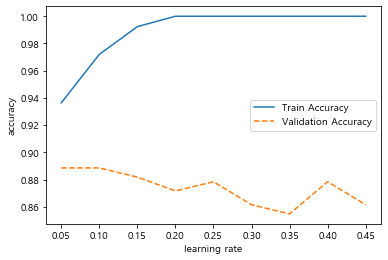

In [95]:
# Learning rate별 정확도 그래프로 확인
plt.plot(para_lr, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_lr, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

In [96]:
# train / test 정확도 결과 저장
train_accuracy=[]
val_accuracy=[]
# n_estimators : 트리수 변경 10~150
para_n_tree=[n_tree*10 for n_tree in range(1,16)]
for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(n_estimators=v_n_estimators,
                                  learning_rate=0.1,
                                 random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))
# 테이블로 저장
df_accuracy_n=pd.DataFrame()
df_accuracy_n["Estimators"]=para_n_tree
df_accuracy_n["TrainAccuracy"]=train_accuracy
df_accuracy_n["ValidationAccuracy"]=val_accuracy

In [97]:
# n_estimators별 정확도
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,ValidationAccuracy
0,10,0.893,0.902
1,20,0.908,0.895
2,30,0.913,0.892
3,40,0.931,0.892
4,50,0.941,0.889
5,60,0.949,0.885
6,70,0.954,0.885
7,80,0.967,0.889
8,90,0.969,0.885
9,100,0.972,0.889


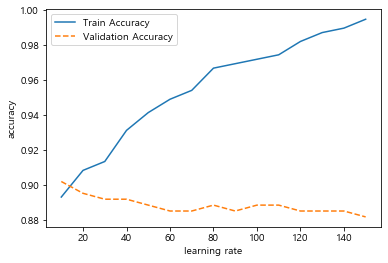

In [98]:
# Learning rate별 정확도 그래프로 확인
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

In [99]:
# train 및 test 정확도 결과 저장
train_accuracy = []
val_accuracy= []

# max_depth : 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingClassifier(max_depth=v_max_depth,
                                n_estimators=110,
                                learning_rate=0.1,
                                random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["ValidationAccuracy"]=val_accuracy

In [100]:
# max_depth별 정확도 테이블
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidationAccuracy
0,1,0.896,0.902
1,2,0.931,0.895
2,3,0.975,0.889
3,4,1.000,0.872
4,5,1.000,0.885
5,6,1.000,0.868
6,7,1.000,0.868
7,8,1.000,0.868
8,9,1.000,0.794
9,10,1.000,0.814


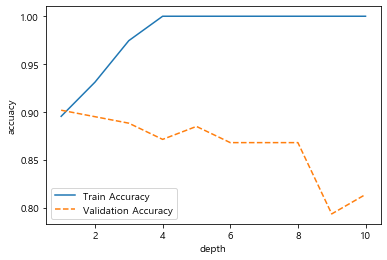

In [101]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuacy")
plt.xlabel("depth")
plt.legend()

In [102]:
# train 및 test 정확도 결과 저장
train_accuracy = []
val_accuracy= []

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split=[n_split*10 for n_split in range(2,11)]

for v_min_samples_split in para_split:
    gb=GradientBoostingClassifier(min_samples_split=v_min_samples_split
                                  ,max_depth=2,
                                n_estimators=110,
                                learning_rate=0.1,
                                random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["ValidationAccuracy"]=val_accuracy

In [103]:
# min_samples_split 정확도 테이블
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,20,0.929,0.892
1,30,0.921,0.895
2,40,0.926,0.892
3,50,0.921,0.889
4,60,0.921,0.889
5,70,0.921,0.892
6,80,0.921,0.892
7,90,0.921,0.892
8,100,0.924,0.885


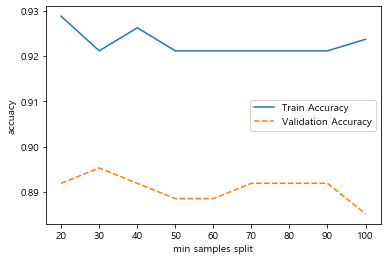

In [104]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuacy")
plt.xlabel("min samples split")
plt.legend()

In [105]:
# train 및 test 정확도 결과 저장
train_accuracy = []
val_accuracy= []

# min_samples_leaf :잎사귀 노드 최소 자료수 제한
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingClassifier(min_samples_leaf=v_min_samples_leaf
        ,min_samples_split=30
                                  ,max_depth=2,
                                n_estimators=110,
                                learning_rate=0.1,
                                random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["ValidationAccuracy"]=val_accuracy

In [106]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidationAccuracy
0,10,0.906,0.905
1,20,0.913,0.899
2,30,0.908,0.905
3,40,0.903,0.902
4,50,0.888,0.905
5,60,0.888,0.905
6,70,0.891,0.905
7,80,0.888,0.905
8,90,0.888,0.905
9,100,0.888,0.905


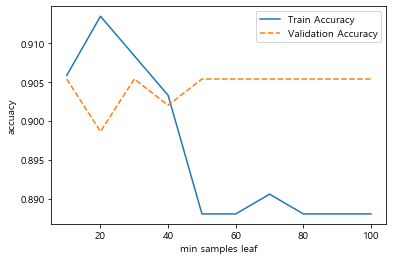

In [107]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuacy")
plt.xlabel("min samples leaf")
plt.legend()

In [108]:
# 최종 모델
gb_final=GradientBoostingClassifier(min_samples_leaf=30,
                                    min_samples_split=30,
                                   max_depth=2,
                                   n_estimators=110,
                                   learning_rate=0.1,
                                   random_state=1234)
gb_final.fit(df_train_x, df_train_y)

# 예측
gb_y_pred=gb_final.predict(df_test_x)

# Train 데이터 정확도 / Test 데이터 정확도
print("Accuracy on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on Test set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, gb_y_pred)))

Accuracy on training set:0.908
Accuracy on Test set:0.868
Confusion matrix:
[[257   2]
 [ 37   0]]


In [109]:
# feature_importances_ : 설명변수 중요도
v_feature_name=df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
1,height,0.235
0,age,0.168
5,bmi,0.152
7,pulse_count,0.118
6,whtr,0.107
4,waist,0.102
3,bust,0.054
2,weight,0.050
11,new_bp_judge_0,0.012
12,new_bp_judge_1,0.001


Text(0, 0.5, '설명변수')

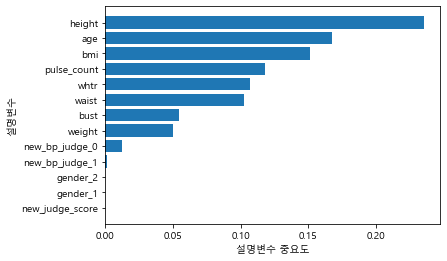

In [110]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 거절 고객 분류

In [111]:
test_data = pd.read_csv("new_insu_pre_review.csv", engine="python")

In [112]:
rejection = test_data[test_data['judge']=='거절']

In [113]:
normal_rejection = rejection[rejection['review_cat']=='일반검진']
normal_rejection

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,new_bt_mch_judge,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge
37,C112409,일반검진,거절,2015-01-20,1,69,178,75,99,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,C112414,일반검진,거절,2014-10-13,1,68,165,70,94,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,C112421,일반검진,거절,2015-08-02,1,69,165,55,93,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,C112437,일반검진,거절,2015-03-24,1,68,163,60,100,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,C112449,일반검진,거절,2014-11-26,1,67,164,55,93,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,C134023,일반검진,거절,2015-06-24,2,63,156,50,90,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14830,C134058,일반검진,거절,2015-07-30,2,69,158,70,103,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14884,C134153,일반검진,거절,2015-05-31,2,37,161,53,80,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14886,C134160,일반검진,거절,2015-08-20,2,53,150,60,91,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
normal_rejection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 37 to 14931
Data columns (total 50 columns):
customer_id              483 non-null object
review_cat               483 non-null object
judge                    483 non-null object
review_date              483 non-null object
gender                   483 non-null int64
age                      483 non-null int64
height                   483 non-null int64
weight                   483 non-null int64
bust                     483 non-null int64
waist                    483 non-null int64
bmi                      483 non-null float64
whtr                     483 non-null float64
bp_min                   483 non-null int64
bp_max                   483 non-null int64
pulse_count              483 non-null int64
bt_chol                  0 non-null float64
bt_crea                  0 non-null float64
bt_gluc                  0 non-null float64
bt_hb                    0 non-null float64
bt_hbsa                  0 non-null object
bt_hc

In [115]:
hook = normal_rejection.drop(['customer_id','review_cat','review_date',
                             'bt_chol','bt_crea','bt_gluc','bt_hb','bt_hbsa',
                             'bt_hct','bt_mch','bt_mchc','bt_mvc','bt_plat',
                             'bt_rbc','bt_wbc','bt_rgpt','bt_sgot','bt_sgpt','bt_trig',
                             'new_bt_chol_judge','new_bt_crea_judge',
                             'new_bt_gluc_judge','new_bt_hb_judge','new_bt_hbsa_judge',
                             'new_bt_hct_judge','new_bt_mch_judge','new_bt_mchc_judge',
                             'new_bt_mvc_judge','new_bt_plat_judge','new_bt_rbc_judge',
                             'new_bt_wbc_judge','new_bt_rgpt_judge','new_bt_sgot_judge',
                             'new_bt_sgpt_judge','new_bt_trig_judge','judge',
                             'bp_min','bp_max','new_pulse_count_judge'], axis=1)

In [116]:
new = hook
new['gender'] = new['gender'].astype('object')
new['new_bp_judge'] = new['new_bp_judge'].astype('object')

In [117]:
happ = pd.get_dummies(new)
happ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 37 to 14931
Data columns (total 13 columns):
age                483 non-null int64
height             483 non-null int64
weight             483 non-null int64
bust               483 non-null int64
waist              483 non-null int64
bmi                483 non-null float64
whtr               483 non-null float64
pulse_count        483 non-null int64
new_judge_score    483 non-null int64
gender_1           483 non-null uint8
gender_2           483 non-null uint8
new_bp_judge_0     483 non-null uint8
new_bp_judge_1     483 non-null uint8
dtypes: float64(2), int64(7), uint8(4)
memory usage: 39.6 KB


In [118]:
# 의사결정나무
y_pred1=dt_tree_final.predict(happ)
print("Accuracy:{0:.3f}\n".format(dt_tree_final.score(df_test_x, df_test_y)))

Accuracy:0.885



In [119]:
happ['dt_pred'] = y_pred1
happ.groupby('dt_pred').count()

,age,height,weight,bust,waist,bmi,whtr,pulse_count,new_judge_score,gender_1,gender_2,new_bp_judge_0,new_bp_judge_1
dt_pred,,,,,,,,,,,,,
0,476,476,476,476,476,476,476,476,476,476,476,476,476
1,7,7,7,7,7,7,7,7,7,7,7,7,7


In [120]:
happ = happ.drop(['dt_pred'],axis=1)

In [121]:
# 랜덤 포레스트 
y_pred2=rf_tree_final.predict(happ)
print("Accuracy:{0:.3f}\n".format(rf_tree_final.score(df_test_x, df_test_y)))

Accuracy:0.889



In [122]:
happ['rf_pred'] = y_pred2
happ.groupby('rf_pred').count()

,age,height,weight,bust,waist,bmi,whtr,pulse_count,new_judge_score,gender_1,gender_2,new_bp_judge_0,new_bp_judge_1
rf_pred,,,,,,,,,,,,,
0,479,479,479,479,479,479,479,479,479,479,479,479,479
1,4,4,4,4,4,4,4,4,4,4,4,4,4


In [123]:
happ = happ.drop(['rf_pred'],axis=1)

In [125]:
# 그래디언트 부스팅
y_pred3=gb_final.predict(happ)
print("Accuracy:{0:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))

Accuracy:0.868



In [126]:
happ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 37 to 14931
Data columns (total 13 columns):
age                483 non-null int64
height             483 non-null int64
weight             483 non-null int64
bust               483 non-null int64
waist              483 non-null int64
bmi                483 non-null float64
whtr               483 non-null float64
pulse_count        483 non-null int64
new_judge_score    483 non-null int64
gender_1           483 non-null uint8
gender_2           483 non-null uint8
new_bp_judge_0     483 non-null uint8
new_bp_judge_1     483 non-null uint8
dtypes: float64(2), int64(7), uint8(4)
memory usage: 39.6 KB


In [127]:
happ['gb_pred'] = y_pred3
happ.groupby('gb_pred').count()

,age,height,weight,bust,waist,bmi,whtr,pulse_count,new_judge_score,gender_1,gender_2,new_bp_judge_0,new_bp_judge_1
gb_pred,,,,,,,,,,,,,
0,478,478,478,478,478,478,478,478,478,478,478,478,478
1,5,5,5,5,5,5,5,5,5,5,5,5,5


In [128]:
happ[happ['gb_pred']==1]

,age,height,weight,bust,waist,bmi,whtr,pulse_count,new_judge_score,gender_1,gender_2,new_bp_judge_0,new_bp_judge_1,gb_pred
5258,40,172,85,100,89,28.731747,0.517442,70,0,1,0,1,0,1
6006,32,171,84,98,88,28.726788,0.514620,68,0,1,0,1,0,1
6878,21,136,75,111,106,40.549308,0.779412,66,0,1,0,0,1,1
12781,23,167,85,118,93,30.477966,0.556886,68,0,0,1,1,0,1
14381,29,172,61,103,81,20.619254,0.470930,72,0,0,1,1,0,1


### 모델 평가

In [129]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [130]:
model=['Decision Tree','Random Forest','Gradient Boosting']
train_accuracy = []
test_accuracy = []
model_f1_score = []
model_auc = []
model_precision_score=[]
model_recall_score=[]

- 의사결정나무

In [131]:
# 모델 생성
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=1234)
dt_model.fit(df_train_x,df_train_y)

# Train 정확도
train_accuracy.append(dt_model.score(df_train_x,df_train_y))
# Test 정확도
test_accuracy.append(dt_model.score(df_test_x,df_test_y))

# 예측값
y_pred = dt_model.predict(df_test_x)

# roc_curve / 거짓 양성 비율 / 진짜 양성 비율 (재현율)
fpr,tpr,threshold = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc curve 저장                     
model_auc.append(roc_auc)

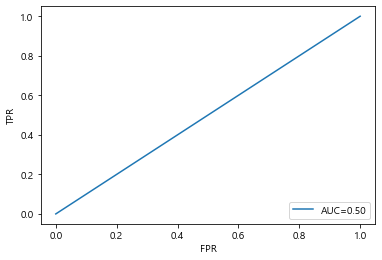

In [132]:
plt.plot(fpr,tpr,label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [133]:
#f1스코어
model_f1_score.append(f1_score(df_test_y,y_pred))
#precision 스코어
model_precision_score.append(precision_score(df_test_y,y_pred))
#recall 스코어
model_recall_score.append(recall_score(df_test_y,y_pred))

C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


- 랜덤 포레스트

In [134]:
# 모델 생성
rf_model = RandomForestClassifier(n_estimators=110, max_depth=10, min_samples_split=10, 
                                     min_samples_leaf=1, random_state=1234)
rf_model.fit(df_test_x, df_test_y)

# Train 정확도
train_accuracy.append(rf_model.score(df_train_x,df_train_y))
# Test 정확도
test_accuracy.append(rf_model.score(df_test_x,df_test_y))

# 예측값
y_pred = rf_model.predict(df_test_x)

# roc_curve / 거짓 양성 비율 / 진짜 양성 비율 (재현율)
fpr,tpr,threshold = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc curve 저장                     
model_auc.append(roc_auc)

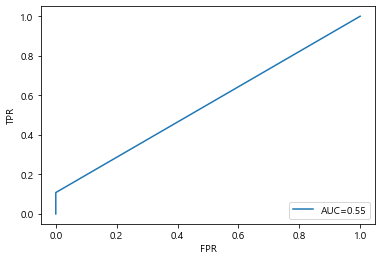

In [135]:
plt.plot(fpr,tpr,label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [136]:
#f1스코어
model_f1_score.append(f1_score(df_test_y,y_pred))
#precision 스코어
model_precision_score.append(precision_score(df_test_y,y_pred))
#recall 스코어
model_recall_score.append(recall_score(df_test_y,y_pred))

- 그래디언트 부스팅

In [137]:
# 모델 생성
gb_final = GradientBoostingClassifier(min_samples_leaf=30,
                                    min_samples_split=30,
                                   max_depth=2,
                                   n_estimators=110,
                                   learning_rate=0.1,
                                   random_state=1234)
gb_final.fit(df_test_x, df_test_y)

# Train 정확도
train_accuracy.append(gb_final.score(df_train_x,df_train_y))
# Test 정확도
test_accuracy.append(gb_final.score(df_test_x,df_test_y))

# 예측값
y_pred = gb_final.predict(df_test_x)

# roc_curve / 거짓 양성 비율 / 진짜 양성 비율 (재현율)
fpr,tpr,threshold = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc curve 저장                     
model_auc.append(roc_auc)

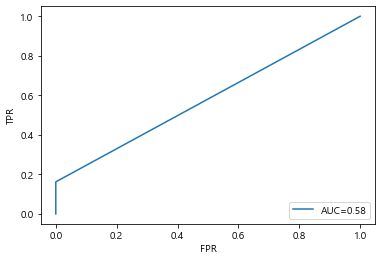

In [138]:
plt.plot(fpr,tpr,label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [139]:
#f1스코어
model_f1_score.append(f1_score(df_test_y,y_pred))
#precision 스코어
model_precision_score.append(precision_score(df_test_y,y_pred))
#recall 스코어
model_recall_score.append(recall_score(df_test_y,y_pred))

In [140]:
# 모델별 정확도 표
df_eval = pd.DataFrame(index=model)
df_eval['Train Accuracy'] = train_accuracy
df_eval['Test Accuracy'] = test_accuracy
df_eval['F1 score'] = model_f1_score
df_eval['AUC'] = model_auc
df_eval['PrecisionScore']=model_precision_score
df_eval['RecallScore']=model_recall_score
df_eval.round(3)

,Train Accuracy,Test Accuracy,F1 score,AUC,PrecisionScore,RecallScore
Decision Tree,0.896,0.875,0.000,0.500,0.0,0.000
Random Forest,0.888,0.889,0.195,0.554,1.0,0.108
Gradient Boosting,0.880,0.895,0.279,0.581,1.0,0.162


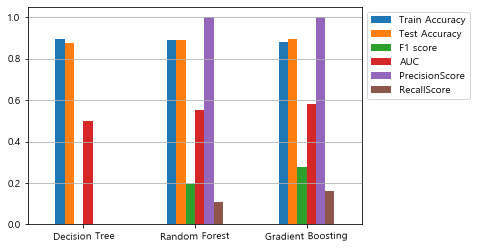

In [141]:
# 정확도 bar plot 생성
df_eval.plot.bar(rot=1)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(axis='y')

### 1분류를 통해 도출된 위험 고객

In [142]:
happ['gb_pred'].value_counts()

0    478
1      5
Name: gb_pred, dtype: int64

In [143]:
happ[happ['gb_pred']==1]

,age,height,weight,bust,waist,bmi,whtr,pulse_count,new_judge_score,gender_1,gender_2,new_bp_judge_0,new_bp_judge_1,gb_pred
5258,40,172,85,100,89,28.731747,0.517442,70,0,1,0,1,0,1
6006,32,171,84,98,88,28.726788,0.514620,68,0,1,0,1,0,1
6878,21,136,75,111,106,40.549308,0.779412,66,0,1,0,0,1,1
12781,23,167,85,118,93,30.477966,0.556886,68,0,0,1,1,0,1
14381,29,172,61,103,81,20.619254,0.470930,72,0,0,1,1,0,1


In [144]:
# 확실히 거절 시킬 사람들.
real_reject = happ[happ['gb_pred']==1]
real_reject

,age,height,weight,bust,waist,bmi,whtr,pulse_count,new_judge_score,gender_1,gender_2,new_bp_judge_0,new_bp_judge_1,gb_pred
5258,40,172,85,100,89,28.731747,0.517442,70,0,1,0,1,0,1
6006,32,171,84,98,88,28.726788,0.514620,68,0,1,0,1,0,1
6878,21,136,75,111,106,40.549308,0.779412,66,0,1,0,0,1,1
12781,23,167,85,118,93,30.477966,0.556886,68,0,0,1,1,0,1
14381,29,172,61,103,81,20.619254,0.470930,72,0,0,1,1,0,1


In [145]:
# 거절된 사람들 중에 한 번 더 생각해서 할증과 거절 나누기.
one_more = happ[happ['gb_pred']==0]
one_more.head()

,age,height,weight,bust,waist,bmi,whtr,pulse_count,new_judge_score,gender_1,gender_2,new_bp_judge_0,new_bp_judge_1,gb_pred
37,69,178,75,99,90,23.671254,0.505618,60,0,1,0,0,1,0
40,68,165,70,94,88,25.711662,0.533333,74,0,1,0,0,1,0
44,69,165,55,93,82,20.202020,0.496970,70,0,1,0,1,0,0
57,68,163,60,100,84,22.582709,0.515337,64,0,1,0,1,0,0
65,67,164,55,93,79,20.449137,0.481707,51,1,1,0,0,1,0


In [146]:
happ

,age,height,weight,bust,waist,bmi,whtr,pulse_count,new_judge_score,gender_1,gender_2,new_bp_judge_0,new_bp_judge_1,gb_pred
37,69,178,75,99,90,23.671254,0.505618,60,0,1,0,0,1,0
40,68,165,70,94,88,25.711662,0.533333,74,0,1,0,0,1,0
44,69,165,55,93,82,20.202020,0.496970,70,0,1,0,1,0,0
57,68,163,60,100,84,22.582709,0.515337,64,0,1,0,1,0,0
65,67,164,55,93,79,20.449137,0.481707,51,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,63,156,50,90,82,20.545694,0.525641,68,0,0,1,1,0,0
14830,69,158,70,103,90,28.040378,0.569620,64,0,0,1,1,0,0
14884,37,161,53,80,69,20.446742,0.428571,74,0,0,1,1,0,0
14886,53,150,60,91,82,26.666667,0.546667,76,0,0,1,0,1,0


In [147]:
lol = pd.merge(normal_rejection, happ['gb_pred'], left_index=True, right_index=True, how='left')
lol

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge,gb_pred
37,C112409,일반검진,거절,2015-01-20,1,69,178,75,99,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
40,C112414,일반검진,거절,2014-10-13,1,68,165,70,94,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
44,C112421,일반검진,거절,2015-08-02,1,69,165,55,93,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
57,C112437,일반검진,거절,2015-03-24,1,68,163,60,100,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
65,C112449,일반검진,거절,2014-11-26,1,67,164,55,93,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,C134023,일반검진,거절,2015-06-24,2,63,156,50,90,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
14830,C134058,일반검진,거절,2015-07-30,2,69,158,70,103,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
14884,C134153,일반검진,거절,2015-05-31,2,37,161,53,80,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
14886,C134160,일반검진,거절,2015-08-20,2,53,150,60,91,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
